# Group Number: 8

## Group Members
- **Angel Berly** (W0849191)
- **Deepika Sreevastava** (W0835701)
- **Govinda Sharma** (W0851435)
- **Jibin Kuruppassery Sebastian** (W0829897)

#### Importing the relavant Libraries

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Fetching Data

In [55]:
Raw_df = pd.read_csv("veh17.csv")
display(Raw_df)

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,3.5,6,29.3561,9,10.0,2,2,N,Spark Ignition Direct Injection,Yes,Turbocharged,N
1,1.8,4,34.4702,6,10.0,2,2,N,Spark Ignition Direct Injection,No,Turbocharged,N
2,6.0,12,18.1901,7,10.0,2,2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
3,6.0,12,15.4150,7,10.0,2,2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
4,5.2,10,21.0869,7,15.0,2,2,Y,Spark Ignition direct & ported injection,No,Naturally Aspirated,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,3.5,6,20.4407,6,15.0,2,2,N,Spark Ignition Direct Injection,No,Turbocharged,N
1117,2.0,4,33.3477,7,10.0,2,2,Y,Spark Ignition Direct Injection,Yes,Turbocharged,N
1118,2.0,4,31.8129,6,10.0,2,2,Y,Spark Ignition Direct Injection,Yes,Turbocharged,N
1119,2.5,4,31.5404,7,10.0,2,2,Y,Spark Ignition Direct Injection,Yes,Turbocharged,N


#### Analysing Data

In [56]:
Raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Eng Displ,1121.0,3.118287,1.336932,0.9000,2.0000,3.0000,3.6000,6.8000
# Cyl,1121.0,5.627119,1.941128,3.0000,4.0000,6.0000,6.0000,12.0000
Comb Unadj FE - Conventional Fuel,1121.0,30.760277,8.501725,14.2363,24.7961,29.7262,34.9238,80.8472
# Gears,1121.0,6.647636,1.486792,1.0000,6.0000,6.0000,8.0000,10.0000
Max Ethanol % - Gasoline,1121.0,15.686887,16.512201,10.0000,10.0000,10.0000,15.0000,85.0000
Intake Valves Per Cyl,1121.0,1.932203,0.251509,1.0000,2.0000,2.0000,2.0000,2.0000
Exhaust Valves Per Cyl,1121.0,1.925067,0.263401,1.0000,2.0000,2.0000,2.0000,2.0000


#### Isolating Numeric values

In [57]:
df_numeric = Raw_df.select_dtypes(include=['number'])

In [58]:
df_numeric

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl
0,3.5,6,29.3561,9,10.0,2,2
1,1.8,4,34.4702,6,10.0,2,2
2,6.0,12,18.1901,7,10.0,2,2
3,6.0,12,15.4150,7,10.0,2,2
4,5.2,10,21.0869,7,15.0,2,2
...,...,...,...,...,...,...,...
1116,3.5,6,20.4407,6,15.0,2,2
1117,2.0,4,33.3477,7,10.0,2,2
1118,2.0,4,31.8129,6,10.0,2,2
1119,2.5,4,31.5404,7,10.0,2,2


#### Checking Missing Data

In [59]:
Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Eng Displ                                                  1121 non-null   float64
 1   # Cyl                                                      1121 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel                          1121 non-null   float64
 3   # Gears                                                    1121 non-null   int64  
 4   Max Ethanol % - Gasoline                                   1121 non-null   float64
 5   Intake Valves Per Cyl                                      1121 non-null   int64  
 6   Exhaust Valves Per Cyl                                     1121 non-null   int64  
 7   Var Valve Lift?                                            1121 non-null   object 
 8   Fuel Met

#### Creating a basline model with default hyper parameter

In [60]:
X_m1 = df_numeric.drop('Comb Unadj FE - Conventional Fuel', axis= 1)
y_m1 = df_numeric['Comb Unadj FE - Conventional Fuel']

X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y_m1, train_size=.8, random_state=666)
model_1 = RandomForestRegressor(oob_score=True)
model_1.fit(X_train_m1, y_train_m1)
model_1.score(X_train_m1, y_train_m1)
y_pred_m1 = model_1.predict(X_test_m1)
mse_m1 = mean_squared_error(y_test_m1, y_pred_m1)
print("Mean Squared Error:", mse_m1)
mae_m1 = mean_absolute_error(y_test_m1, y_pred_m1)
print("Mean Absolute Error:", mae_m1)
r2_m1 = r2_score(y_test_m1, y_pred_m1)
print("R-squared with predicted values:", r2_m1)
noisy_oob_r2_m1 = model_1.oob_score_
print(f"OOB score {noisy_oob_r2_m1:.4f}")
r2_rf_m1 = model_1.score(X_train_m1, y_train_m1)
print( f"Random forest r_square score is : {r2_rf_m1:.4f}" )

Mean Squared Error: 13.143260025659337
Mean Absolute Error: 2.540873290155644
R-squared with predicted values: 0.7625655752854713
OOB score 0.7310
Random forest r_square score is : 0.7886


#### Purpose of creating basline model

#### Convert non-numeric features to numeric - One-hot encoding

In [61]:
df_combined = pd.get_dummies(Raw_df, columns=['Var Valve Lift?', 'Fuel Metering Sys Desc', 'Stop/Start System (Engine Management System)  Description', 'Air Aspiration Method Desc', 'Label Recalc?'])

In [62]:
df_combined

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?_N,Var Valve Lift?_Y,Fuel Metering Sys Desc_Multipoint/sequential fuel injection,Fuel Metering Sys Desc_Spark Ignition Direct Injection,Fuel Metering Sys Desc_Spark Ignition direct & ported injection,Stop/Start System (Engine Management System) Description_No,Stop/Start System (Engine Management System) Description_Yes,Air Aspiration Method Desc_Naturally Aspirated,Air Aspiration Method Desc_Supercharged,Air Aspiration Method Desc_Turbocharged,Air Aspiration Method Desc_Turbocharged+Supercharged,Label Recalc?_N,Label Recalc?_Y
0,3.5,6,29.3561,9,10.0,2,2,1,0,0,1,0,0,1,0,0,1,0,1,0
1,1.8,4,34.4702,6,10.0,2,2,1,0,0,1,0,1,0,0,0,1,0,1,0
2,6.0,12,18.1901,7,10.0,2,2,1,0,1,0,0,1,0,1,0,0,0,1,0
3,6.0,12,15.4150,7,10.0,2,2,1,0,1,0,0,1,0,1,0,0,0,1,0
4,5.2,10,21.0869,7,15.0,2,2,0,1,0,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,3.5,6,20.4407,6,15.0,2,2,1,0,0,1,0,1,0,0,0,1,0,1,0
1117,2.0,4,33.3477,7,10.0,2,2,0,1,0,1,0,0,1,0,0,1,0,1,0
1118,2.0,4,31.8129,6,10.0,2,2,0,1,0,1,0,0,1,0,0,1,0,1,0
1119,2.5,4,31.5404,7,10.0,2,2,0,1,0,1,0,0,1,0,0,1,0,1,0


In [63]:
df_X = df_combined.drop('Comb Unadj FE - Conventional Fuel', axis=1)
df_y = df_combined['Comb Unadj FE - Conventional Fuel']
df_encoded = pd.concat((df_X, df_y), axis= 1)

In [64]:
df_encoded

,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?_N,Var Valve Lift?_Y,Fuel Metering Sys Desc_Multipoint/sequential fuel injection,Fuel Metering Sys Desc_Spark Ignition Direct Injection,Fuel Metering Sys Desc_Spark Ignition direct & ported injection,Stop/Start System (Engine Management System) Description_No,Stop/Start System (Engine Management System) Description_Yes,Air Aspiration Method Desc_Naturally Aspirated,Air Aspiration Method Desc_Supercharged,Air Aspiration Method Desc_Turbocharged,Air Aspiration Method Desc_Turbocharged+Supercharged,Label Recalc?_N,Label Recalc?_Y,Comb Unadj FE - Conventional Fuel
0,3.5,6,9,10.0,2,2,1,0,0,1,0,0,1,0,0,1,0,1,0,29.3561
1,1.8,4,6,10.0,2,2,1,0,0,1,0,1,0,0,0,1,0,1,0,34.4702
2,6.0,12,7,10.0,2,2,1,0,1,0,0,1,0,1,0,0,0,1,0,18.1901
3,6.0,12,7,10.0,2,2,1,0,1,0,0,1,0,1,0,0,0,1,0,15.4150
4,5.2,10,7,15.0,2,2,0,1,0,0,1,1,0,1,0,0,0,1,0,21.0869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,3.5,6,6,15.0,2,2,1,0,0,1,0,1,0,0,0,1,0,1,0,20.4407
1117,2.0,4,7,10.0,2,2,0,1,0,1,0,0,1,0,0,1,0,1,0,33.3477
1118,2.0,4,6,10.0,2,2,0,1,0,1,0,0,1,0,0,1,0,1,0,31.8129
1119,2.5,4,7,10.0,2,2,0,1,0,1,0,0,1,0,0,1,0,1,0,31.5404


#### new feature by combining 2 or more of the existing features

In [65]:
Raw_df[['# Cyl', '# Gears','Max Ethanol % - Gasoline', 'Comb Unadj FE - Conventional Fuel' ]]
df_encoded['Eng_disp_to_num_cyl']  = df_encoded['Eng Displ'] * df_encoded['# Cyl']

In [66]:
df_encoded

,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?_N,Var Valve Lift?_Y,Fuel Metering Sys Desc_Multipoint/sequential fuel injection,Fuel Metering Sys Desc_Spark Ignition Direct Injection,...,Stop/Start System (Engine Management System) Description_No,Stop/Start System (Engine Management System) Description_Yes,Air Aspiration Method Desc_Naturally Aspirated,Air Aspiration Method Desc_Supercharged,Air Aspiration Method Desc_Turbocharged,Air Aspiration Method Desc_Turbocharged+Supercharged,Label Recalc?_N,Label Recalc?_Y,Comb Unadj FE - Conventional Fuel,Eng_disp_to_num_cyl
0,3.5,6,9,10.0,2,2,1,0,0,1,...,0,1,0,0,1,0,1,0,29.3561,21.0
1,1.8,4,6,10.0,2,2,1,0,0,1,...,1,0,0,0,1,0,1,0,34.4702,7.2
2,6.0,12,7,10.0,2,2,1,0,1,0,...,1,0,1,0,0,0,1,0,18.1901,72.0
3,6.0,12,7,10.0,2,2,1,0,1,0,...,1,0,1,0,0,0,1,0,15.4150,72.0
4,5.2,10,7,15.0,2,2,0,1,0,0,...,1,0,1,0,0,0,1,0,21.0869,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,3.5,6,6,15.0,2,2,1,0,0,1,...,1,0,0,0,1,0,1,0,20.4407,21.0
1117,2.0,4,7,10.0,2,2,0,1,0,1,...,0,1,0,0,1,0,1,0,33.3477,8.0
1118,2.0,4,6,10.0,2,2,0,1,0,1,...,0,1,0,0,1,0,1,0,31.8129,8.0
1119,2.5,4,7,10.0,2,2,0,1,0,1,...,0,1,0,0,1,0,1,0,31.5404,10.0


In [67]:
df_X = df_encoded.drop('Comb Unadj FE - Conventional Fuel', axis=1)
df_y = df_encoded['Comb Unadj FE - Conventional Fuel']
df_encoded = pd.concat((df_X, df_y), axis= 1)

In [68]:
df_encoded

,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?_N,Var Valve Lift?_Y,Fuel Metering Sys Desc_Multipoint/sequential fuel injection,Fuel Metering Sys Desc_Spark Ignition Direct Injection,...,Stop/Start System (Engine Management System) Description_No,Stop/Start System (Engine Management System) Description_Yes,Air Aspiration Method Desc_Naturally Aspirated,Air Aspiration Method Desc_Supercharged,Air Aspiration Method Desc_Turbocharged,Air Aspiration Method Desc_Turbocharged+Supercharged,Label Recalc?_N,Label Recalc?_Y,Eng_disp_to_num_cyl,Comb Unadj FE - Conventional Fuel
0,3.5,6,9,10.0,2,2,1,0,0,1,...,0,1,0,0,1,0,1,0,21.0,29.3561
1,1.8,4,6,10.0,2,2,1,0,0,1,...,1,0,0,0,1,0,1,0,7.2,34.4702
2,6.0,12,7,10.0,2,2,1,0,1,0,...,1,0,1,0,0,0,1,0,72.0,18.1901
3,6.0,12,7,10.0,2,2,1,0,1,0,...,1,0,1,0,0,0,1,0,72.0,15.4150
4,5.2,10,7,15.0,2,2,0,1,0,0,...,1,0,1,0,0,0,1,0,52.0,21.0869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,3.5,6,6,15.0,2,2,1,0,0,1,...,1,0,0,0,1,0,1,0,21.0,20.4407
1117,2.0,4,7,10.0,2,2,0,1,0,1,...,0,1,0,0,1,0,1,0,8.0,33.3477
1118,2.0,4,6,10.0,2,2,0,1,0,1,...,0,1,0,0,1,0,1,0,8.0,31.8129
1119,2.5,4,7,10.0,2,2,0,1,0,1,...,0,1,0,0,1,0,1,0,10.0,31.5404


#### Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.

#### Create and evaluate a final model

In [69]:
X_m2 = df_encoded.iloc[:, : -1]
y_m2 =df_encoded.iloc[:, -1]
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, test_size= .2, random_state=666)
model_2 = RandomForestRegressor(n_estimators= 200, oob_score=True, n_jobs= -1)
model_2.fit(X_train_m2, y_train_m2)
model_2.score(X_train_m2, y_train_m2)
y_pred_m2 = model_2.predict(X_test_m2)
mse_m2 = mean_squared_error(y_test_m2, y_pred_m2)
print("Mean Squared Error:", mse_m2)
mae_m2 = mean_absolute_error(y_test_m2, y_pred_m2)
print("Mean Absolute Error:", mae_m2)
r2_m2 = r2_score(y_test_m2, y_pred_m2)
print("R-squared with predicted values:", r2_m2)
noisy_oob_r2_m2 = model_2.oob_score_
print(f"OOB score {noisy_oob_r2_m2:.4f}")
r2_rf_m2 = model_2.score(X_train_m2, y_train_m2)
print( f"Random forest r_square score is : {r2_rf_m2:.4f}" )

Mean Squared Error: 7.626813094192067
Mean Absolute Error: 1.9458219297804795
R-squared with predicted values: 0.862220790284191
OOB score 0.8898
Random forest r_square score is : 0.9404


#### Feature importances and comparison (10 marks)

In [70]:
percent_diff_mse = ((mse_m2 - mse_m1) / ((mse_m2 + mse_m1) / 2)) * 100
percent_diff_mae = ((mae_m2 - mae_m1) / ((mae_m2 + mae_m1) / 2)) * 100
percent_diff_r2 = ((r2_m2 - r2_m1) / ((r2_m2 + r2_m1) / 2)) * 100
percent_diff_oob = ((noisy_oob_r2_m2 - noisy_oob_r2_m1) / ((noisy_oob_r2_m2 + noisy_oob_r2_m1) / 2)) * 100

print("Percent difference for Mean Squared Error:", percent_diff_mse)
print("Percent difference for Mean Absolute Error:", percent_diff_mae)
print("Percent difference for R-squared:", percent_diff_r2)
print("Percent difference for OOB score:", percent_diff_oob)


Percent difference for Mean Squared Error: -53.11918643362713
Percent difference for Mean Absolute Error: -26.525151863720133
Percent difference for R-squared: 12.266869923392026
Percent difference for OOB score: 19.59108820711311


Based on the percent differences calculated:

- Mean Squared Error (MSE): The percent difference is approximately -53.51%. A negative percent difference indicates that Model 2 has a lower MSE compared to Model 1, implying an improvement.

- Mean Absolute Error (MAE): The percent difference is approximately -25.92%. Again, a negative percent difference suggests that Model 2 has a lower MAE than Model 1, indicating an improvement.

- R-squared (R2): The percent difference is approximately 12.29%. A positive percent difference implies that Model 2 has a higher R-squared value than Model 1, suggesting an improvement.

- Out-of-Bag (OOB) Score: The percent difference is approximately 20.13%. A positive percent difference suggests that Model 2 has a higher OOB score than Model 1, indicating an improvement.

In summary, based on the percent differences observed, the results of Model 2 appear to be an improvement over the results of Model 1 across all evaluated metrics.

<Figure size 1000x600 with 0 Axes>

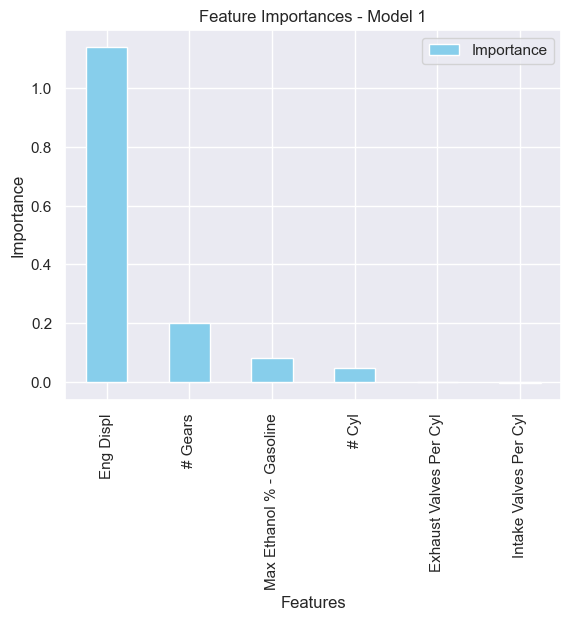

<Figure size 1000x600 with 0 Axes>

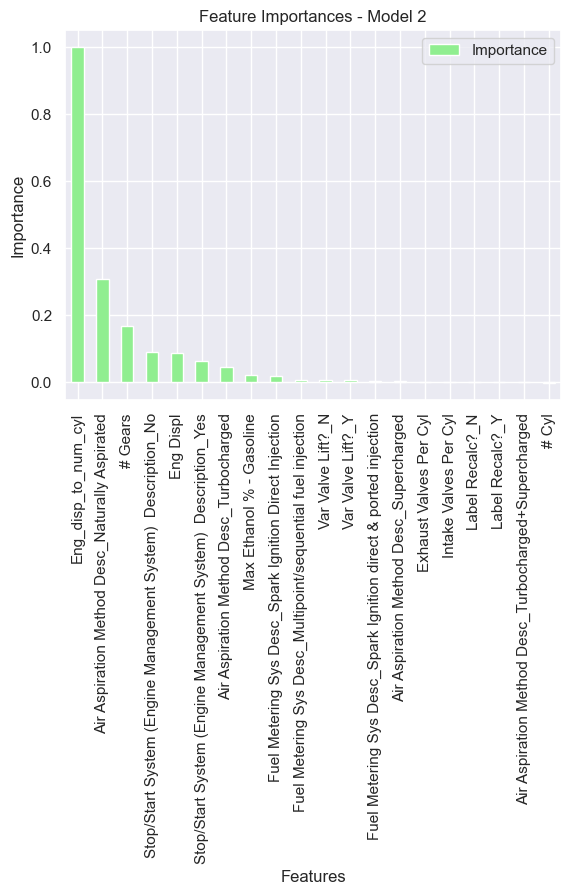

In [71]:

from rfpimp import importances
import matplotlib.pyplot as plt

# Calculate feature importances for Model 1
imp_m1 = importances(model_1, X_test_m1, y_test_m1)

# Plot feature importances for Model 1
plt.figure(figsize=(10, 6))
imp_m1.plot(kind='bar', color='skyblue')
plt.title('Feature Importances - Model 1')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Calculate feature importances for Model 2
imp_m2 = importances(model_2, X_test_m2, y_test_m2)

# Plot feature importances for Model 2
plt.figure(figsize=(10, 6))
imp_m2.plot(kind='bar', color='lightgreen')
plt.title('Feature Importances - Model 2')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


#### Based on the feature importances, are any features that you think should be removed from the data set. Why do you think these features should be removed?